# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

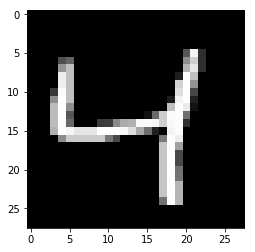

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [9]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [10]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [11]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6940
Epoch: 1/20... Training loss: 0.6906
Epoch: 1/20... Training loss: 0.6874
Epoch: 1/20... Training loss: 0.6839
Epoch: 1/20... Training loss: 0.6790
Epoch: 1/20... Training loss: 0.6735
Epoch: 1/20... Training loss: 0.6664
Epoch: 1/20... Training loss: 0.6595
Epoch: 1/20... Training loss: 0.6498
Epoch: 1/20... Training loss: 0.6388
Epoch: 1/20... Training loss: 0.6280
Epoch: 1/20... Training loss: 0.6163
Epoch: 1/20... Training loss: 0.6038
Epoch: 1/20... Training loss: 0.5870
Epoch: 1/20... Training loss: 0.5745
Epoch: 1/20... Training loss: 0.5557
Epoch: 1/20... Training loss: 0.5377
Epoch: 1/20... Training loss: 0.5207
Epoch: 1/20... Training loss: 0.5043
Epoch: 1/20... Training loss: 0.4903
Epoch: 1/20... Training loss: 0.4713
Epoch: 1/20... Training loss: 0.4550
Epoch: 1/20... Training loss: 0.4354
Epoch: 1/20... Training loss: 0.4243
Epoch: 1/20... Training loss: 0.4069
Epoch: 1/20... Training loss: 0.3934
Epoch: 1/20... Training loss: 0.3803
E

Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1865
Epoch: 1/20... Training loss: 0.1917
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1956
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1865
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1874
Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1966
Epoch: 1/20... Training loss: 0.1811
Epoch: 1/20... Training loss: 0.1830
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1859
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1819
Epoch: 1/20... Training loss: 0.1838
Epoch: 1/20... Training loss: 0.1857
E

Epoch: 2/20... Training loss: 0.1418
Epoch: 2/20... Training loss: 0.1503
Epoch: 2/20... Training loss: 0.1479
Epoch: 2/20... Training loss: 0.1466
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1490
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1463
Epoch: 2/20... Training loss: 0.1458
Epoch: 2/20... Training loss: 0.1447
Epoch: 2/20... Training loss: 0.1506
Epoch: 2/20... Training loss: 0.1481
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1461
Epoch: 2/20... Training loss: 0.1459
Epoch: 2/20... Training loss: 0.1453
Epoch: 2/20... Training loss: 0.1485
Epoch: 2/20... Training loss: 0.1507
Epoch: 2/20... Training loss: 0.1489
Epoch: 2/20... Training loss: 0.1480
Epoch: 2/20... Training loss: 0.1467
Epoch: 2/20... Training loss: 0.1409
Epoch: 2/20... Training loss: 0.1496
Epoch: 2/20... Training loss: 0.1431
Epoch: 2/20... Training loss: 0.1509
Epoch: 2/20... Training loss: 0.1451
E

Epoch: 3/20... Training loss: 0.1238
Epoch: 3/20... Training loss: 0.1271
Epoch: 3/20... Training loss: 0.1290
Epoch: 3/20... Training loss: 0.1271
Epoch: 3/20... Training loss: 0.1275
Epoch: 3/20... Training loss: 0.1287
Epoch: 3/20... Training loss: 0.1294
Epoch: 3/20... Training loss: 0.1266
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1294
Epoch: 3/20... Training loss: 0.1266
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1269
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1258
Epoch: 3/20... Training loss: 0.1264
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1257
Epoch: 3/20... Training loss: 0.1261
Epoch: 3/20... Training loss: 0.1242
Epoch: 3/20... Training loss: 0.1276
Epoch: 3/20... Training loss: 0.1252
Epoch: 3/20... Training loss: 0.1253
Epoch: 3/20... Training loss: 0.1296
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1252
Epoch: 3/20... Training loss: 0.1290
E

Epoch: 4/20... Training loss: 0.1125
Epoch: 4/20... Training loss: 0.1136
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1119
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1119
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1128
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1118
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1130
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1141
E

Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1059
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1046
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1042
E

Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.0986
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1009
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1097
E

Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0967
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0955
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1007
E

Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.1015
E

Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.1012
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.1002
E

Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.1004
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0900
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0910
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0908
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0987
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0908
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0991
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0980
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0987
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0981
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0893
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0979
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0899
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0893
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0894
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0971
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0887
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0973
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0876
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0987
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

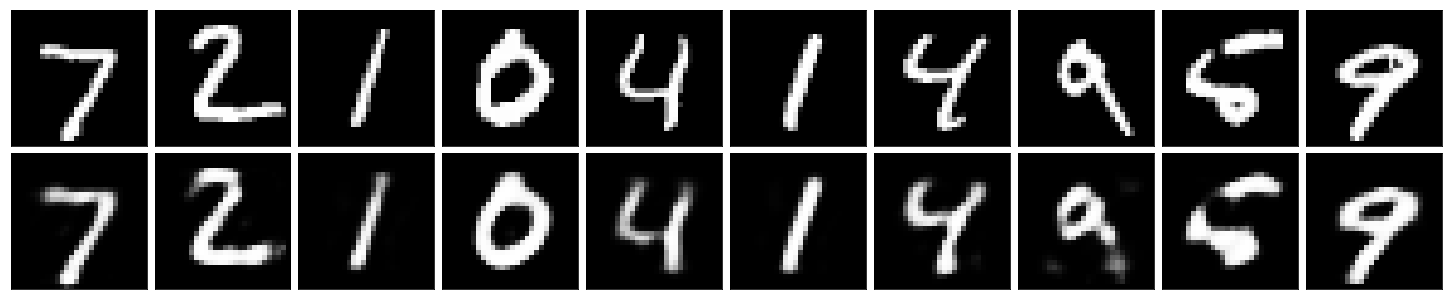

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [13]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.